<a href="https://colab.research.google.com/github/EirafWali/GEOL558-unsupervised-corals/blob/main/unsupervised_corals_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised ML: Corals dataset for coral clustering.
#### By: Eiraf Wali Dawoud
##### 1/16/2025

#### Dataset Source:
https://www.kaggle.com/code/artemborzenko/distribution-of-coral-reefs/notebook

The dataset can be found in:

https://raw.githubusercontent.com/EirafWali/GEOL558-unsupervised-corals/main/corals_worldwide_dataset.csv

---
#### About the dataset:
- The dataset contains different oceanic systems' factors that can affect the corals ecosystem. These include the water salinity and temprature which will be of interest in this study.

---
#### Objective:
This study will look into different clustering methods using saliniy and temperature data for corals. This will help in understanding the favored environments for corals habitats.

#### Importance:
This study can help marine scientists and geoscientists to understand coral colonies' behaviour with different oceanic environmental factors.

#### Methods
- K-mean clustering
- Hierarchical Clustering
- Feature-Based Clustering (PCA + K-Means)


### This notebook is dedicated to load, clean, understand, and visualize the dataset before applying the unsupervised ML.

In [70]:
# Import the needed libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [9]:
# Reading the data from github for easy access by the public

# file path from github repo:
file_path = "https://raw.githubusercontent.com/EirafWali/GEOL558-unsupervised-corals/main/corals_worldwide_dataset.csv"

#read the csv
df_corals = pd.read_csv(file_path)

# Display the header of the datarame with the first 5 rows
df_corals.head()

,name,salinity,January_temp,June_temp,area,latitude,longitude,type of sea,corals,silt/sulfide
0,Adriatic Sea,38.298527,15.658799,20.855299,138000,43,15,2,1,0
1,Adriatic Sea,38.304909,16.297098,19.501200,138000,43,15,2,1,0
2,Adriatic Sea,38.462040,16.251598,19.028500,138000,43,15,2,1,0
3,Adriatic Sea,38.121601,15.709500,22.882999,138000,43,15,2,1,0
4,Adriatic Sea,38.519196,15.733400,21.824799,138000,43,15,2,1,0


In [10]:
# In this code box are some Exploratory data analysis (EDA) of the dataset and printing the results.

# Understanding basic information about the dataset
print('Below are some general information on the dataset:')
print(df_corals.info())

# Looking into some statistics
print('The following information are some statistical overview:')
print(df_corals.describe())

# Check the size of the dataset by the shape to see if it fulfills the assignment requirement
print('The size of this dataset is:',df_corals.shape, 'rows and columns respectively')

Below are some general information on the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2451 entries, 0 to 2450
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2451 non-null   object 
 1   salinity      2451 non-null   float64
 2   January_temp  2451 non-null   float64
 3   June_temp     2451 non-null   float64
 4   area          2451 non-null   int64  
 5   latitude      2451 non-null   int64  
 6   longitude     2451 non-null   int64  
 7   type of sea   2451 non-null   int64  
 8   corals        2451 non-null   int64  
 9   silt/sulfide  2451 non-null   int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 191.6+ KB
None
The following information are some statistical overview:
          salinity  January_temp    June_temp          area     latitude  \
count  2451.000000   2451.000000  2451.000000  2.451000e+03  2451.000000   
mean     32.819880     18.026784    21.612658  1

In [11]:
# This code box looks into the data and checks if there is any missing values in all the columns.

# looking for missing values and giving the sum in each column
missing_data = df_corals.isnull().sum()
print(missing_data)

name            0
salinity        0
January_temp    0
June_temp       0
area            0
latitude        0
longitude       0
type of sea     0
corals          0
silt/sulfide    0
dtype: int64


Note:

Luckily, the CSV containing the data has no missing values in any of the columns and rows.

The data is clean to work with directly.

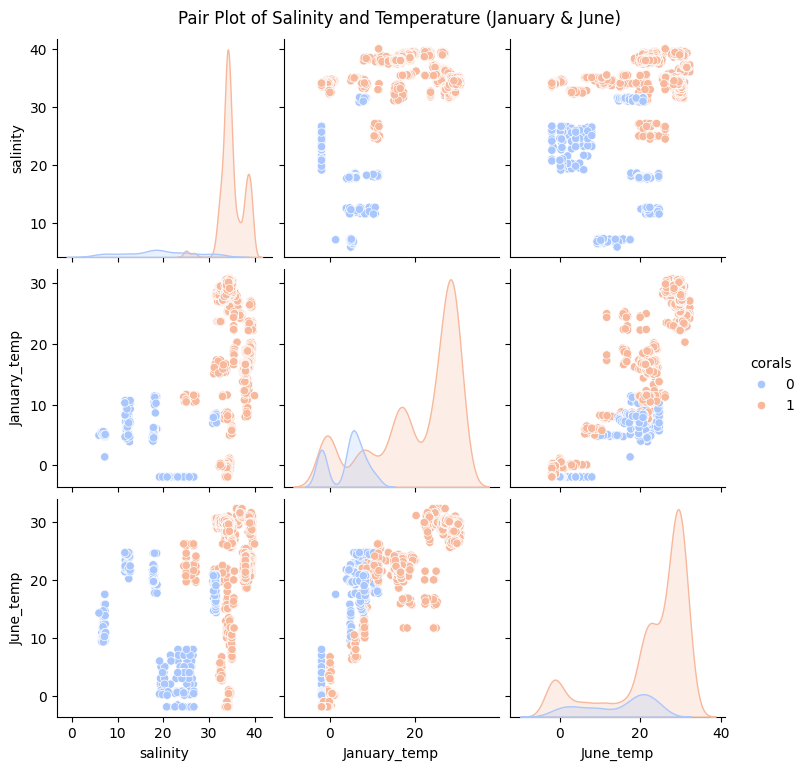

In [20]:
# In this code box is a Seaborn pair plot using seaborn library to understand the saliniy and temperature in both months (January and June)
# Figure 1:

# Create the pair plot using seaborn
sns.pairplot(
    df_corals,
    vars=['salinity', 'January_temp', 'June_temp'],  # Select the needed variables for the plot
    hue='corals',  # Color points by the 'corals' column (present or not present)
    palette='coolwarm'
)

# Add a title to the plot
plt.suptitle("Pair Plot of Salinity and Temperature (January & June)", y=1.02)

# Display the plot
plt.show()

Figure 1: Pair plot for salinity and temperature in January and June.

In the  pair plot we can visualize some clusters as 0 and 1 which in the context of our dataset means corals are present or non-present.

Additionally, we can see that most of the points of present corals (orange color) are clustered at the range of salinity (25 to 42) parts per thousand.

While the temperatures in both months vary from 0 to 40 degrees Celsius, which does not give any clear conclusion to the analysis.

Next, is a correlation matrix heat map for the dataset.

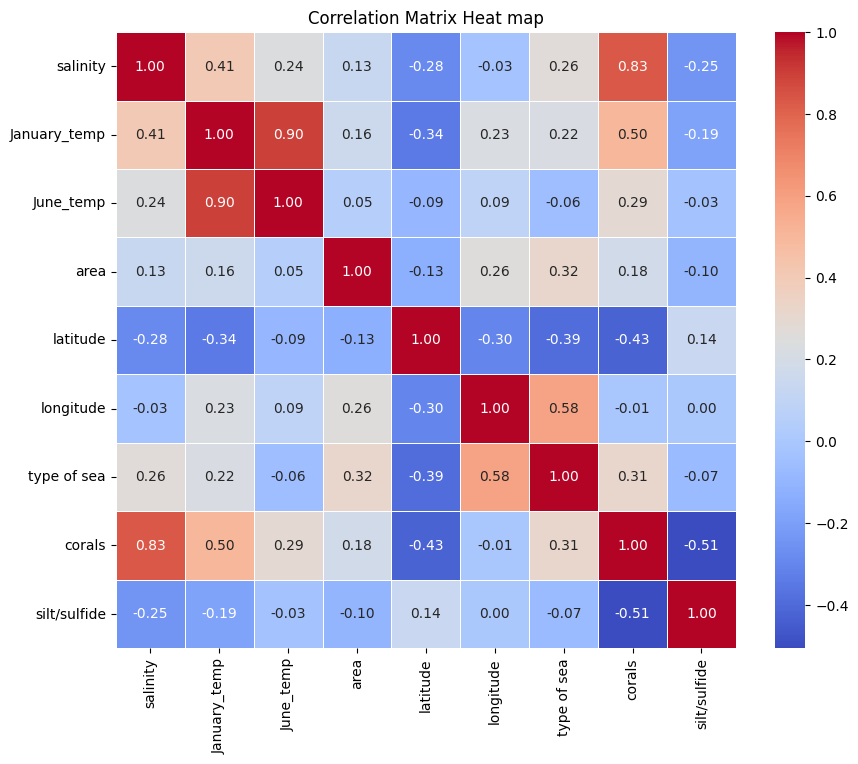

In [24]:
# This code box is to plot a correlation matrix heat map of the dataset
# Figure 2:

# Correlation matrix for numeric columns only
correlation_matrix = df_corals.select_dtypes(include=['number']).corr() # Select only numeric columns for correlation

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,  # Display correlation values
    cmap='coolwarm',  # Color palette
    fmt='.2f',  # Format for the numbers
    linewidths=0.5  # Line width between cells
)

# Add a title
plt.title("Correlation Matrix Heat map")

# Display the plot
plt.show()

## Figure 2: Correlation Matrix Heat Map

### Observations:

Salinity:

- High correlation with coral presence (0.83):

  - Shows a strong positive correlation suggesting that areas with higher salinity levels are more likely to have coral presence.

- Moderate correlation with January_temp (0.41):
  - Shows that salinity increases at January temperatures.

- Weak correlation with June_temp (0.24):
  - Shows little relationship between salinity and summer temperatures.


January Temperature:
- Moderate correlation with Coral Presence (0.50):
  - Shows that higher temperatures in January might positively influence coral presence.

June Temperature:
- Weak correlation with Coral Presence (0.29):
  - Shows weaker relationship with corals compared to January temperatures.

Coral Presence:
- Strong influence by Salinity (0.83) and moderate influence by January_temp (0.50):
  - Shows that salinity plays the bigger role in coral presence.
- Negative influence by Silt/Sulfide (-0.51):
  - Shows that areas with high silt and sulfide content would have less corals.



#### Now let's look into salinity variation with areas with corals peresent and areas with corals non-present.

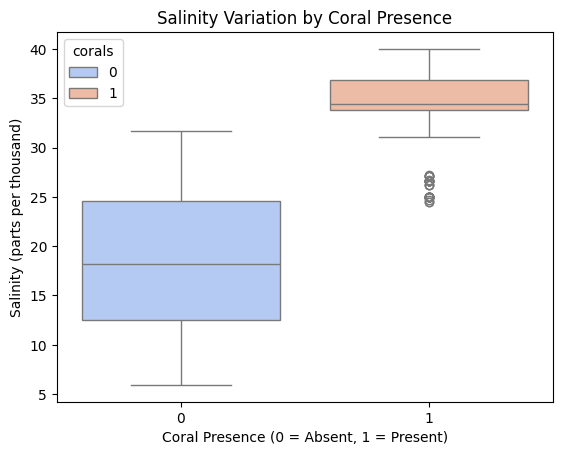

In [32]:
# This code box is to plot a box plot to see the salinity variations with corals presence.
# Figure 3:

# Plot the box plot
sns.boxplot(data=df_corals,
            x='corals', y='salinity',
            hue='corals',                # color it by the corals presence
            palette='coolwarm'
            )

# Add title and labels
plt.title("Salinity Variation by Coral Presence")
plt.xlabel("Coral Presence (0 = Absent, 1 = Present)")
plt.ylabel("Salinity (parts per thousand)")

# Display the plot
plt.show()

## Figure 3: Salinity Variation by Coral Presence (Box Plot)

### Observations:

- The median salinity for areas with coral presence is higher than the areas with corals absence.
This can mean that corals tend to thrive at saltier environments.

- At areas with presence of corals, the interquartile range seems to be narrower, which means that corals thrive within a specific salinity range.
On the other hand, areas with absence of corals, tend to have a wider salinity range, showing more variability.

- There are outliers in the salinity of areas of present corals representing some corals can accomodate to lower salinity ranges.

In [39]:
# This code box is to look into the salinity thresholds for coral presence
# Calculate the min, max, and interquartile range (IQR) for salinity in coral-present regions

# Filter the data for only the coral-present areas (corals = 1)
coral_present_salinity = df_corals[df_corals['corals'] == 1]['salinity']

# Calculate some salinity statistics
salinity_stats = {
    "Minimum salinity for coral presence": coral_present_salinity.min(),
    "Maximum salinity for coral presence": coral_present_salinity.max(),
    "Median salinity for coral presence": coral_present_salinity.median(),
    "25th Percentile": coral_present_salinity.quantile(0.25),
    "75th Percentile": coral_present_salinity.quantile(0.75),
}


# Display the results of statistics
salinity_stats

{'Minimum salinity for coral presence': 24.4971199,
 'Maximum salinity for coral presence': 40.0,
 'Median salinity for coral presence': 34.460935594999995,
 '25th Percentile': 33.790344239999996,
 '75th Percentile': 36.89338303}

In [45]:
# Print the coral-friendly salinity range based on the previous code
print('Most coral-friendly areas have a salinity that is within:',
      f"{coral_present_salinity.quantile(0.25):.2f}",
      'parts per thousand and',
      f"{coral_present_salinity.quantile(0.75):.2f}",'parts per thousand.')


Most coral-friendly areas have a salinity that is within: 33.79 parts per thousand and 36.89 parts per thousand.


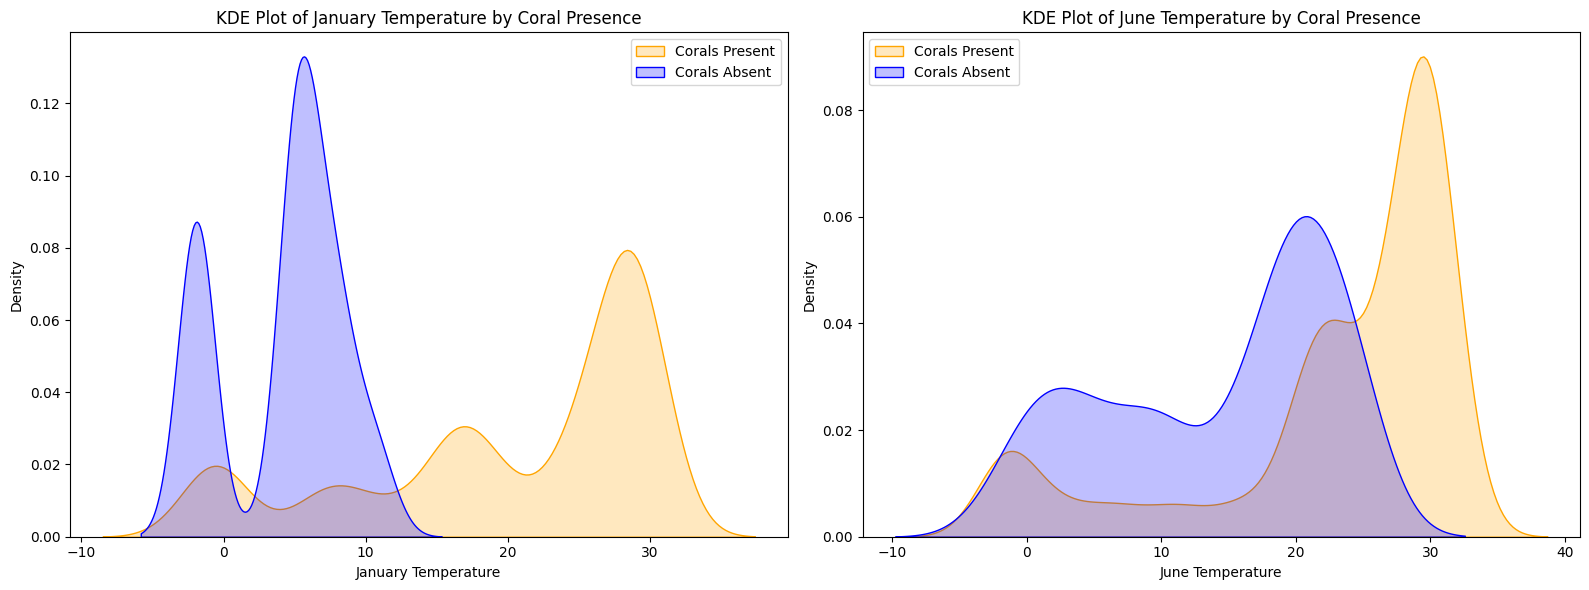

In [49]:
# This code box is to plot 2 KDE plots for the coral presence in both months' temperatures
# Figure 4:

# Initiate the figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# KDE plot for January Temperature
sns.kdeplot(
    data=df_corals[df_corals['corals'] == 1],  # Filter data for coral present
    x='January_temp',
    label='Corals Present',
    fill=True,
    color='orange',
    ax=axes[0]
)
sns.kdeplot(
    data=df_corals[df_corals['corals'] == 0],  # Filter data for coral absent
    x='January_temp',
    label='Corals Absent',
    fill=True,
    color='blue',
    ax=axes[0]
)

# Add title, labels, and legend
axes[0].set_title("KDE Plot of January Temperature by Coral Presence")
axes[0].set_xlabel("January Temperature")
axes[0].set_ylabel("Density")
axes[0].legend()

# KDE plot for June Temperature
sns.kdeplot(
    data=df_corals[df_corals['corals'] == 1],  # Filter data for coral present
    x='June_temp',
    label='Corals Present',
    fill=True,
    color='orange',
    ax=axes[1]
)
sns.kdeplot(
    data=df_corals[df_corals['corals'] == 0],  # Filter data for coral absent
    x='June_temp',
    label='Corals Absent',
    fill=True,
    color='blue',
    ax=axes[1]
)

# Add title, labels, and legend
axes[1].set_title("KDE Plot of June Temperature by Coral Presence")
axes[1].set_xlabel("June Temperature")
axes[1].legend()

# Adjust layout to avoid overlap and display the plot
plt.tight_layout()
plt.show()

## Figure 4: KDE Plots

### Observations:
The KDE plot shows the distribution of temperatures in January on the left, and June on the right for areas with coral presence in orange color and absence in blue.

In January, precent corals show a higher peak around 25–30°C, while absent corals show peaks at cooler temperatures (around 0–10°C) which indicates corals preference to warmer temperatures.

Similarly, in June, corals favor higher temperatures near 25–30°C, while abcence of corals show a broad distriution across cooler ranges.

In [71]:
# Figure 5: Interactive folium map with the locations of corals presence
# The size of the points is by January's temperature.

# Filter the dataset to include only coral present locations
corals_presence = df_corals[df_corals['corals'] == 1]

# Calculate the map center based on coral presence
map_center = [corals_presence['latitude'].mean(), corals_presence['longitude'].mean()]

# To change the map to English labels (my settings shows arabic, hence, I have to change it to English)
m = folium.Map(location=map_center, zoom_start=2, tiles='CartoDB positron')

# Add markers for coral-present locations and make the size correspond to the temperature in January.
for _, row in corals_presence.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['January_temp'] / 5,
        color='blue',
        fill=True,
        fill_opacity=0.7,
    ).add_to(m)

m

## Figure 5: Interactive folium map with the locations of corals presence

We can note that corals are mostly clustered at the Adriatic Sea, Red sea, Mediterranean Sea, Molucca Sea, and the Mozambique Channel.
